In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot

INDICATORS = "../dataset/indicators.csv"
INDICATORS_NO_OUTLIER = "../dataset/indicators_no_outlier.csv"
NO_OUTLIER = "../dataset/customer_supermarket_no_outlier.csv"

In [2]:
ind_no_outlier = pd.read_csv(INDICATORS_NO_OUTLIER, index_col='CustomerID')
#ind_no_outlier.CustomerID = ind_no_outlier.CustomerID.astype(int)
print(ind_no_outlier.head())
print(ind_no_outlier.info())

             Entropy     i   iu  imax  tot_sales  mean_sales
CustomerID                                                  
12347       1.945910  2458  103   319     481.21   68.744286
12348       1.386294  2341   22  1254     178.71   44.677500
12350      -0.000000   197   17   197      65.30   65.300000
12352       2.079442   473   59    98    1337.42  167.177500
12353      -0.000000    20    4    20      24.30   24.300000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 12347 to 18287
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entropy     4183 non-null   float64
 1   i           4183 non-null   int64  
 2   iu          4183 non-null   int64  
 3   imax        4183 non-null   int64  
 4   tot_sales   4183 non-null   float64
 5   mean_sales  4183 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 228.8 KB
None


### Scaling values in order to avoid bias by using a standard scaler

In [3]:
#ind_no_outlier = ind_no_outlier.drop(['Entropy'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_no_outlier.values)

MinMaxScaler()

In [6]:
ind_no_outlier.head().values

array([[ 1.94591015e+00,  2.45800000e+03,  1.03000000e+02,
         3.19000000e+02,  4.81210000e+02,  6.87442857e+01],
       [ 1.38629436e+00,  2.34100000e+03,  2.20000000e+01,
         1.25400000e+03,  1.78710000e+02,  4.46775000e+01],
       [-0.00000000e+00,  1.97000000e+02,  1.70000000e+01,
         1.97000000e+02,  6.53000000e+01,  6.53000000e+01],
       [ 2.07944154e+00,  4.73000000e+02,  5.90000000e+01,
         9.80000000e+01,  1.33742000e+03,  1.67177500e+02],
       [-0.00000000e+00,  2.00000000e+01,  4.00000000e+00,
         2.00000000e+01,  2.43000000e+01,  2.43000000e+01]])

In [7]:
scaler.transform(ind_no_outlier.head().values)

array([[0.5481051 , 0.18668794, 0.32484076, 0.2209868 , 0.1951742 ,
        0.21562885],
       [0.39047795, 0.17779804, 0.06687898, 0.87074357, 0.07243972,
        0.13995189],
       [0.        , 0.01489249, 0.05095541, 0.1362057 , 0.02642544,
        0.20479844],
       [0.58571693, 0.03586354, 0.18471338, 0.06740792, 0.54256756,
        0.52514779],
       [0.        , 0.00144366, 0.00955414, 0.01320361, 0.00979036,
        0.07587573]])

In [8]:
X = scaler.fit_transform(ind_no_outlier.values)

## K-Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Computing the best K

In [10]:
silhouette_list = list()
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=150)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_list.append((silhouette_score(X, labels, metric='euclidean'),i))
    
print(silhouette_list)

[(0.33156676036106447, 3), (0.3410003302470588, 4), (0.30828188112232785, 5), (0.32271150024047374, 6), (0.3231180421958085, 7), (0.3025916147361458, 8), (0.30266518374708745, 9)]


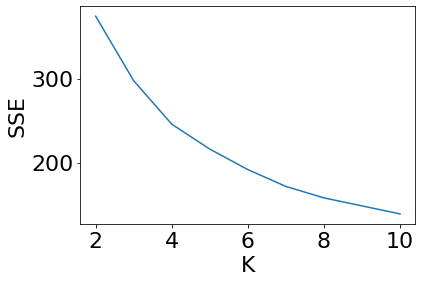

In [11]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

According to both the elbow method and silhouette score method the best value for K seems to be 4

### Clustering with K-Means

In [12]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=150)
kmeans.fit(X)
labels = kmeans.labels_

In [13]:
kmeans.labels_

array([3, 3, 1, ..., 1, 2, 3], dtype=int32)

size of each cluster

In [14]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 587, 1802,  464, 1330]))

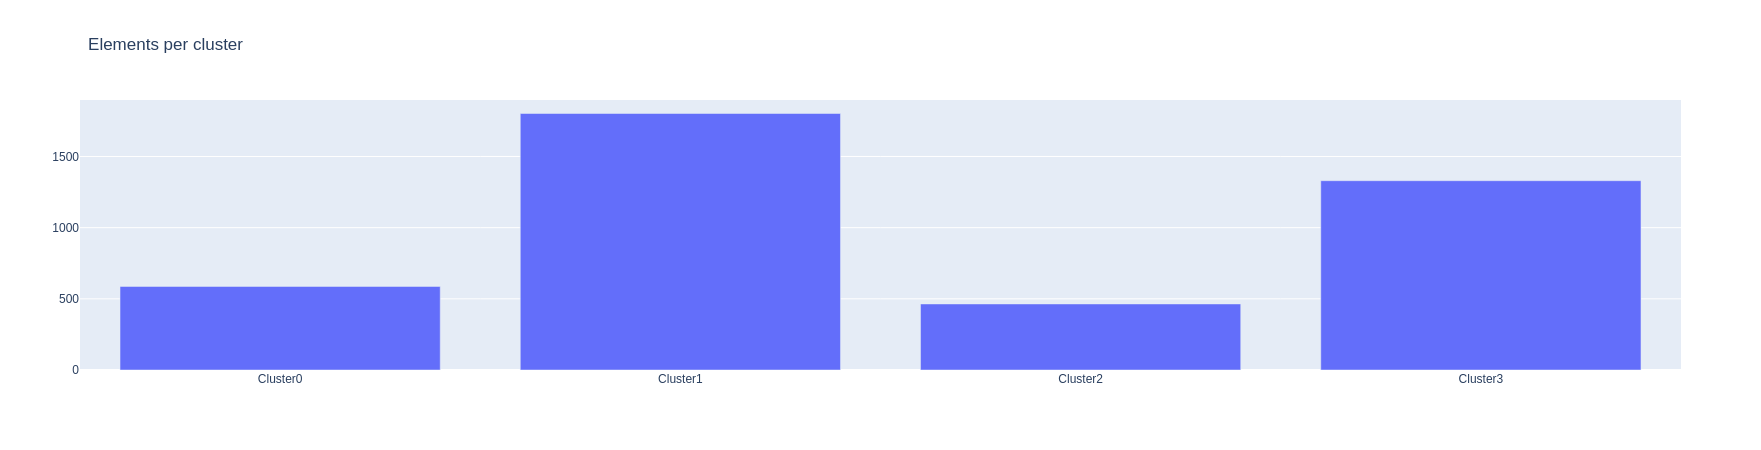

In [32]:
labels_list = ['Cluster'+str(x) for x in np.unique(kmeans.labels_, return_counts=True)[0]]
fig = px.bar(x=labels_list,y=np.unique(kmeans.labels_, return_counts=True)[1], title="Elements per cluster")
fig.update_xaxes(title="")
fig.update_yaxes(title="")
fig.show()

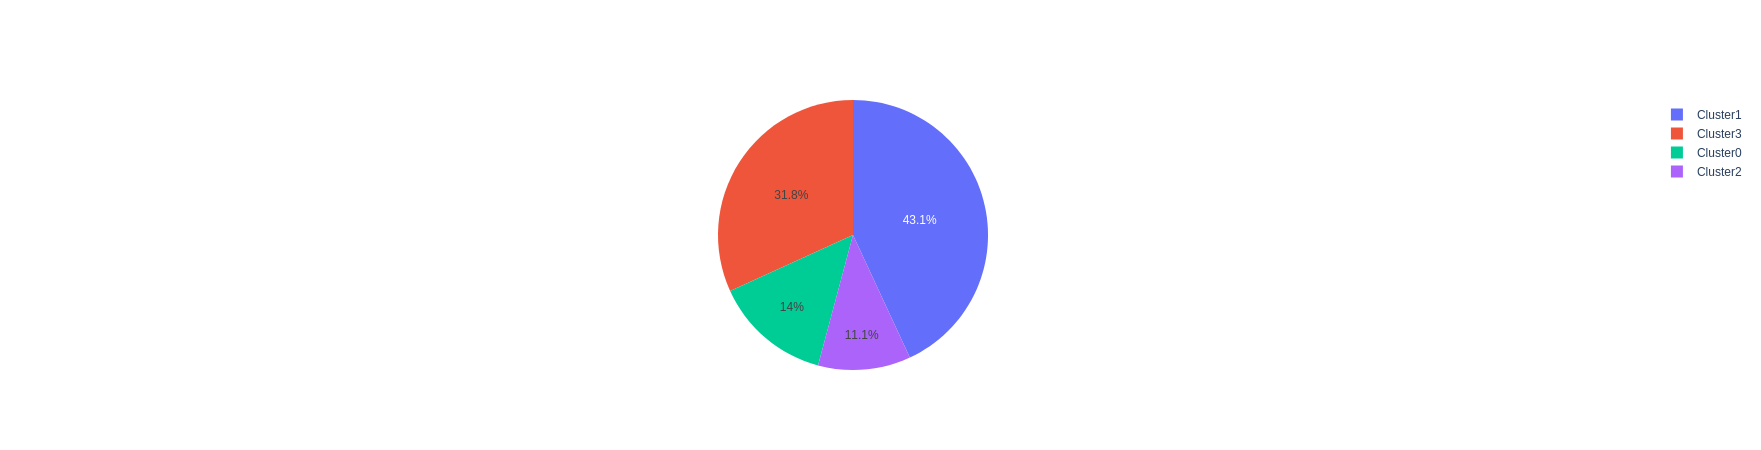

In [33]:
values = np.unique(kmeans.labels_, return_counts=True)[1]
fig = go.Figure(data=[go.Pie(labels=labels_list, values=values)])
fig.show()

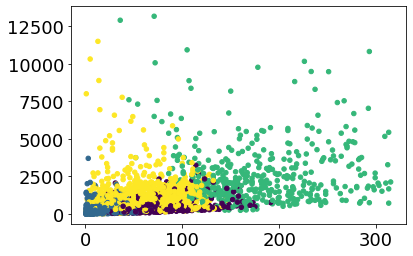

In [30]:
plt.scatter(ind_no_outlier['iu'], ind_no_outlier['i'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

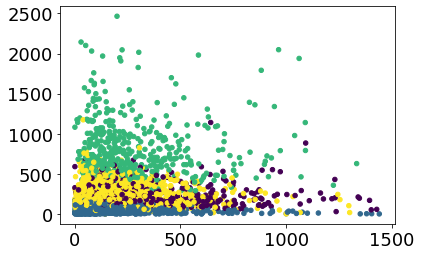

In [34]:
plt.scatter(ind_no_outlier['imax'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

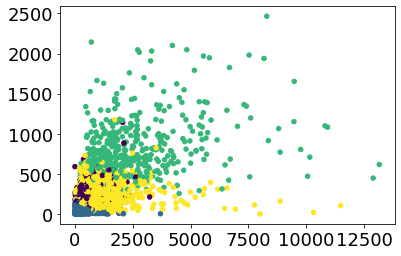

In [35]:
plt.scatter(ind_no_outlier['i'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

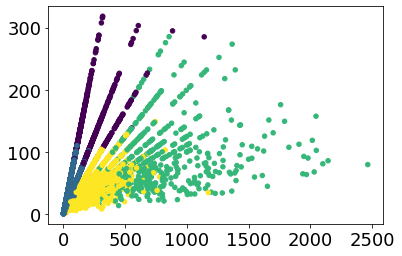

In [38]:
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

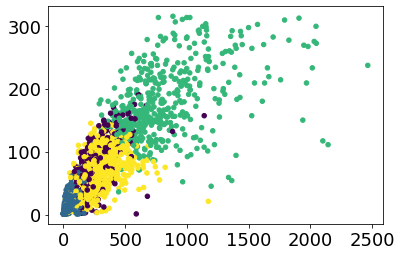

In [39]:
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['iu'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

### Cluster Centers visualization

In [41]:
kmeans.cluster_centers_

array([[0.11125876, 0.03811382, 0.20678355, 0.23125417, 0.08946509,
        0.43295399],
       [0.06621126, 0.0165748 , 0.05301965, 0.11213893, 0.02202912,
        0.12825592],
       [0.61563672, 0.19654514, 0.55931529, 0.19676919, 0.33141606,
        0.29902933],
       [0.42865306, 0.07387461, 0.17543679, 0.13418148, 0.09020236,
        0.14337435]])

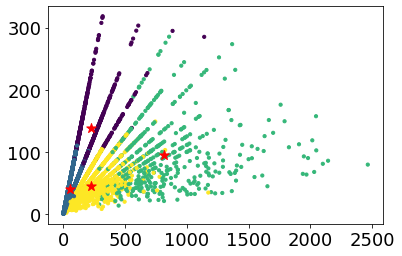

[220.67191297  54.46450666 817.00122845 222.48905485] 
 [137.85802702  40.95794728  95.26730904  45.76590999]


In [45]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 4], centers[:, 5], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

print(centers[:, 4], "\n", centers[:, 5])

### Cluster Centers as parallel coordinates

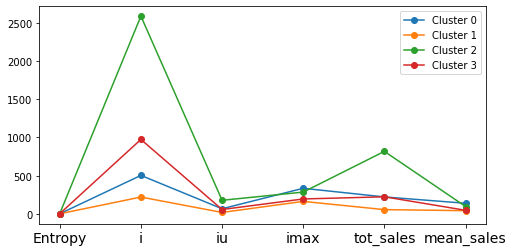

In [46]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ind_no_outlier.columns)), ind_no_outlier.columns, fontsize=14)
plt.legend(fontsize=10)
plt.show()

### Centroids radar chart

<ipython-input-53-6e39158caed1>:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



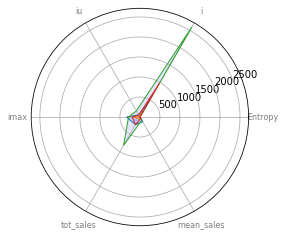

In [53]:
from math import pi
 

# number of variable
N = len(ind_no_outlier.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], ind_no_outlier.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
plt.show()

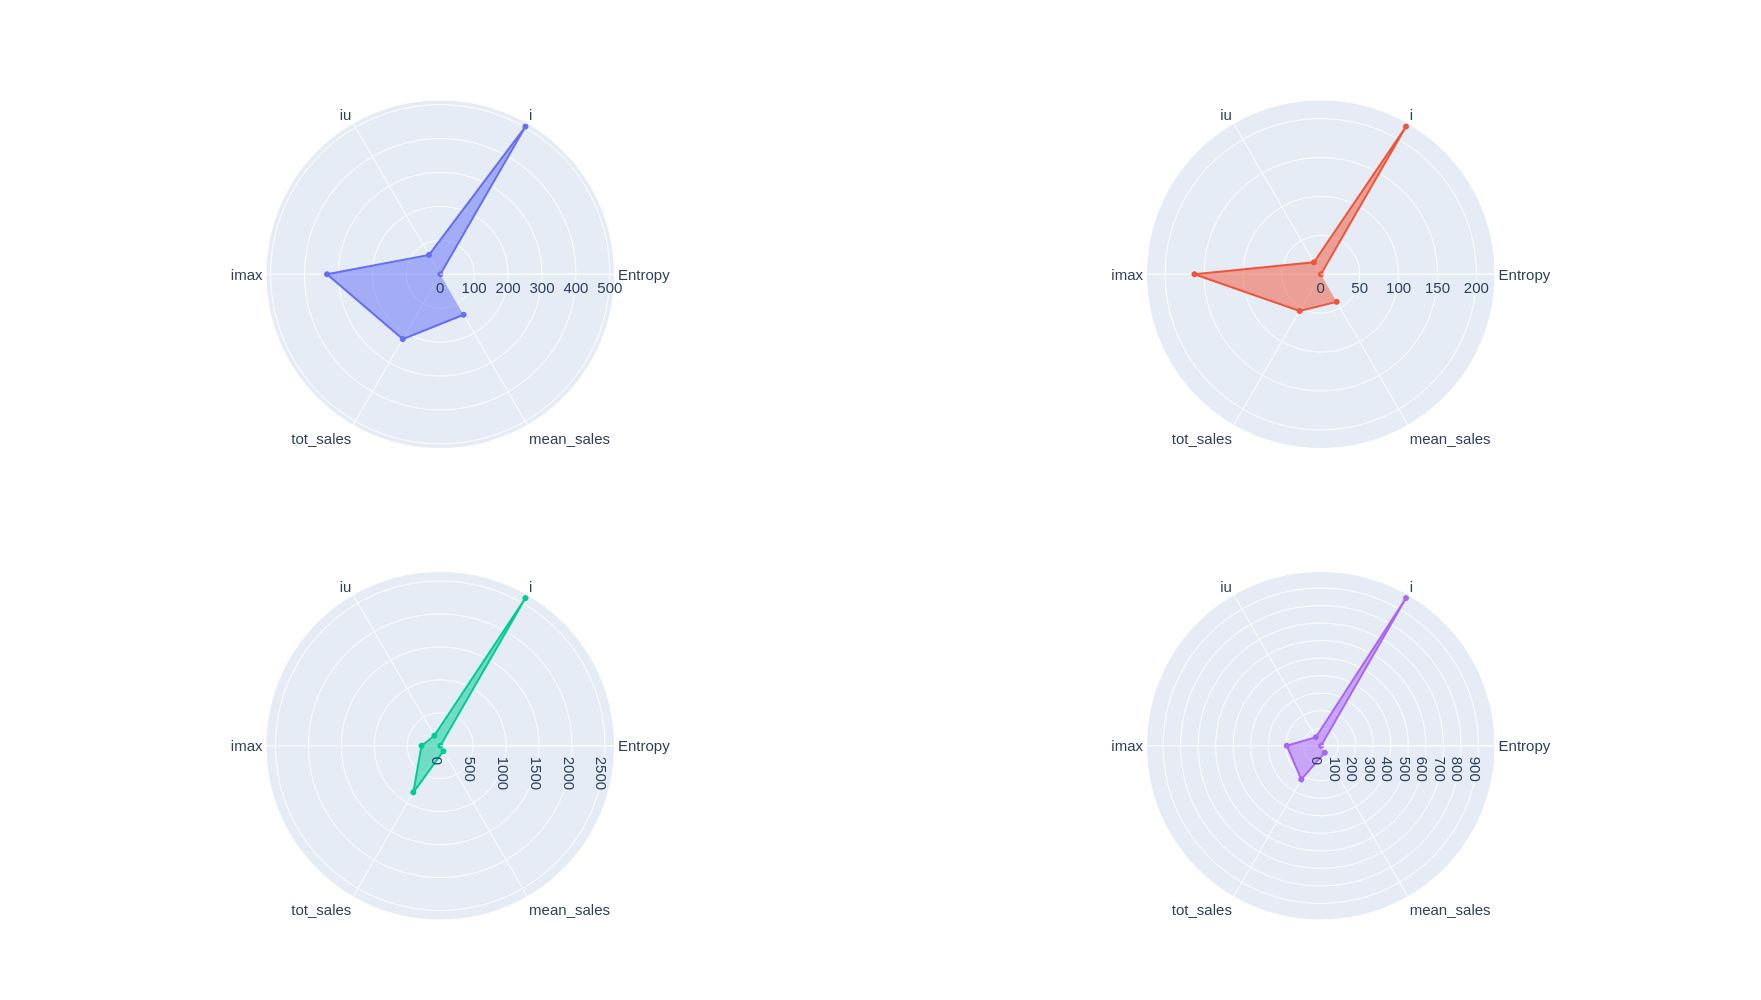

In [118]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
        r = centers[0],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = centers[1],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
        r = centers[2],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
        r = centers[3],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 2, 2)

fig.update_layout(height=1000, width=1000,
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False,
  font=dict(
      size=15
  )
)

fig.show()

### SSE and Clustering Validation

In [78]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 245.6709966219298
Silhouette 0.3410003302470588
Separation 1.0984145380088117


## DBSCAN

In [81]:
from sklearn.cluster import DBSCAN

In [100]:
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=10)

In [101]:
dbscan.labels_

array([ 0, -1,  1, ...,  0, -1,  0])

In [102]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 274, 2442, 1467]))

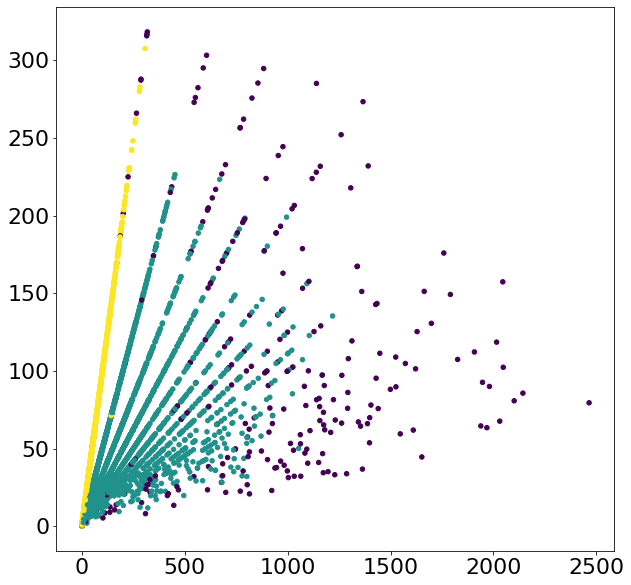

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [104]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.2917960014908513


Best eps with knee method

In [105]:
from scipy.spatial.distance import pdist, squareform

In [106]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.73105694 0.66387299 0.53279352 ... 1.07133743 0.36185839 0.94047801]

[[0.         0.73105694 0.66387299 ... 0.55865088 0.6392608  0.3598479 ]
 [0.73105694 0.         0.85154747 ... 0.86218157 1.25054161 0.55584222]
 [0.66387299 0.85154747 0.         ... 0.23898292 1.16457486 0.41845271]
 ...
 [0.55865088 0.86218157 0.23898292 ... 0.         1.07133743 0.36185839]
 [0.6392608  1.25054161 1.16457486 ... 1.07133743 0.         0.94047801]
 [0.3598479  0.55584222 0.41845271 ... 0.36185839 0.94047801 0.        ]]


In [107]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

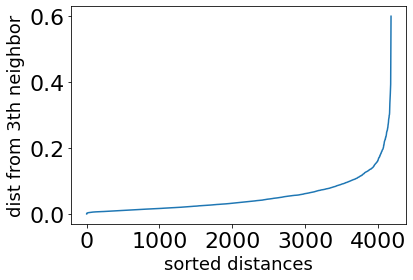

In [108]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical clustering

In [113]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

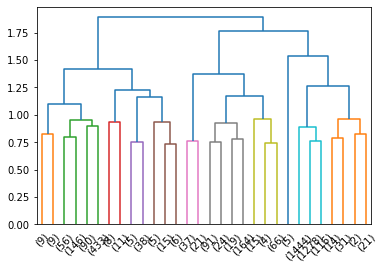

In [114]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

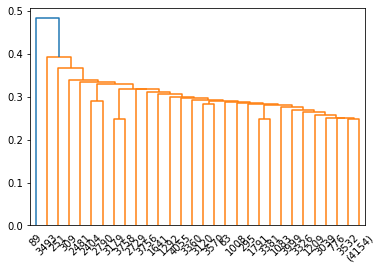

In [117]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

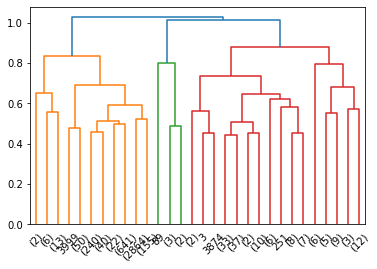

In [116]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')

### Alternative clustering techniques

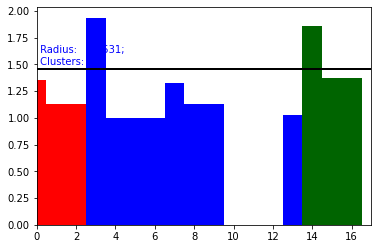

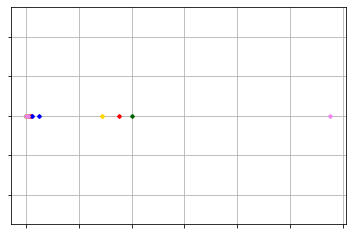

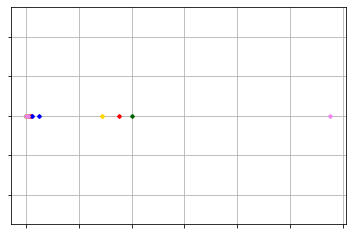

In [131]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# Read sample for clustering from some file
sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)

# Run cluster analysis where connectivity radius is bigger than real
radius = 2.0
neighbors = 3
amount_of_clusters = 3
optics_instance = optics(np.asmatrix(ind_no_outlier), radius, neighbors, amount_of_clusters)

# Performs cluster analysis
optics_instance.process()

# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

# Visualize ordering diagram
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, amount_of_clusters)

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, np.asmatrix(ind_no_outlier))
visualizer.show()

In [129]:
np.asmatrix(ind_no_outlier)

matrix([[ 1.94591015e+00,  2.45800000e+03,  1.03000000e+02,
          3.19000000e+02,  4.81210000e+02,  6.87442857e+01],
        [ 1.38629436e+00,  2.34100000e+03,  2.20000000e+01,
          1.25400000e+03,  1.78710000e+02,  4.46775000e+01],
        [-0.00000000e+00,  1.97000000e+02,  1.70000000e+01,
          1.97000000e+02,  6.53000000e+01,  6.53000000e+01],
        ...,
        [ 6.93147181e-01,  1.03000000e+02,  1.20000000e+01,
          7.50000000e+01,  6.23900000e+01,  3.11950000e+01],
        [ 2.56659892e+00,  1.35700000e+03,  2.63000000e+02,
          6.10000000e+01,  1.17433000e+03,  7.33956250e+01],
        [ 1.09861229e+00,  1.58600000e+03,  5.90000000e+01,
          4.88000000e+02,  1.04550000e+02,  3.48500000e+01]])

In [130]:
sample

[[2.0, 3.0],
 [0.387577, 0.268546],
 [0.17678, 0.582963],
 [3.277701, 0.814082],
 [0.387577, 0.17678],
 [0.268546, 0.582963],
 [2.031145, 0.244597],
 [0.188677, 0.46128],
 [3.525472, 0.265579],
 [2.229583, 0.682189],
 [3.392074, 0.420976],
 [3.589815, 0.832527],
 [1.227873, 0.810909],
 [1.300699, 0.146538],
 [3.596968, 0.421791],
 [3.106757, 0.779664],
 [0.221139, 0.612603],
 [1.496841, 0.495985],
 [2.860498, 0.535719],
 [1.45071, 0.142352],
 [1.745799, 0.066373],
 [1.4048, 0.32968],
 [1.7696, 0.777809],
 [0.464511, 0.672442],
 [2.750803, 0.16552],
 [1.571006, 0.091428],
 [1.18166, 0.857799],
 [0.661957, 0.612812],
 [0.828567, 0.798048],
 [3.313914, 0.216602],
 [3.625645, 0.538592],
 [3.611238, 0.584716],
 [2.904519, 0.465036],
 [3.080431, 0.24549],
 [3.851167, 0.574214],
 [0.944956, 0.077006],
 [3.834215, 0.224878],
 [2.179064, 0.784896],
 [2.716449, 0.944268],
 [0.02978, 0.931252],
 [0.095525, 0.349743],
 [3.835506, 0.889721],
 [1.142732, 0.811691],
 [3.747439, 0.654886],
 [0.948862,